## Examining the internet broadband availability 

In [80]:
# Import the libraries
import pandas as pd
import numpy as np

import os

# Get the current working directory
current_dir = os.getcwd() 
print(current_dir)

/Users/steven/Jupyter


**We can use the keys keyword argument, passing a list of strings that'll serve as the outer-layer names for our data frame, serving as a reminder of which original data frame each set of data came from.**

In [129]:
filename = '1-5-fixed-and-mobile-broadband-penetration.xls'

df = pd.concat([one_sheet.T for
         one_sheet in pd.read_excel(filename, 
                            sheet_name=[0,1],
                            header=3,
                            index_col=0,
                            nrows=38,
                            na_values='..').values()],
    keys=['fixed', 'mobile'],
    axis='columns')

**This is great, except that we now have a list of two data frames, and we actually want them to be in a single data frame. Normally, we can combine data frames with pd.concat, and we can combine them horizontally with axis='columns'. However, we want a multi-index separating the fixed from mobile values. How can we do that?**

In [130]:
df.index = [pd.to_datetime(one_index
                           .replace('Q2-', '30-06-')
                           .replace('Q4-', '31-12-'), dayfirst=True)
                     for one_index in df.index]

**Get the mean() number of fixed broadband users per country, in all of 2023. Which five countries have the greatest number per 100 people? How about mobile broadband? Is there any overlap between these two lists of countries?**

In [131]:
# The five largest countries per 100 people for fixed

df_2023_fixed = (df.loc['2023', 'fixed'].mean()).nlargest(5)

print(df_2023)

Japan            201.515
United States    186.560
Estonia          183.710
Finland          160.410
Israel           145.900
dtype: float64


In [132]:
# The five largest countries per 100 people for mobile

df_2023_mobile = (df.loc['2023', 'mobile'].mean()).nlargest(5)

print(df_2023)

Japan            201.515
United States    186.560
Estonia          183.710
Finland          160.410
Israel           145.900
dtype: float64


In [133]:
# Find the intersection of the top 5 countries between fixed and mobile using 'intersection'
# This method uses the one data set
(
    df.loc['2023', 'fixed']
    .mean()
    .nlargest(5)
    .index
    .intersection(
        df.loc['2023', 'mobile']
        .mean()
        .nlargest(5)
        .index
    )
)

Index([], dtype='object')

In [134]:
# Find the intersection of the top 5 countries between fixed and mobile using 'set' 
# This uses the 2 different data sets
set(df_2023_fixed) & set(df_2023_mobile)

set()

**There are no countries that overlap in either methods!**

**For each country, find the year in which the mobile broadband penetration grew the greatest amount (by percentage), year over year. Plot this as a histogram, to see the number of countries with greatest growth per year.**

<Axes: ylabel='Frequency'>

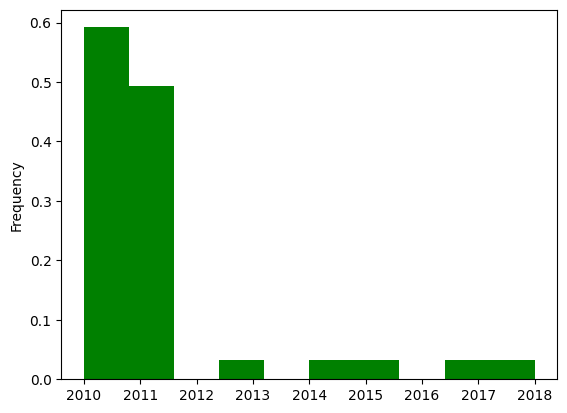

In [135]:
colors = ['green']
(
    df['mobile'] # Use only the mobile data
    .resample('1YE').mean() #Use '1YE' so that it will combine the quarters
    .pct_change() # Use the .pct_change to see percentage growth
    .idxmax()
    .dt.year
    .plot.hist(density = True, color = colors)
)
# Notice there are only years now instead of quarters

**How many countries have more than 100% mobile penetration in a given quarter?**

In [136]:
(
    (df['mobile'] > 100)
    .sum()
    .sort_values()
)

Canada              0
Belgium             0
Colombia            0
Greece              0
Hungary             0
Germany             0
Slovak Republic     0
Italy               0
Mexico              0
Slovenia            0
Türkiye             0
Portugal            1
Costa Rica          2
France              4
Czechia             4
Chile               6
United Kingdom      9
Luxembourg         10
Lithuania          10
Austria            10
Spain              10
Switzerland        10
Israel             11
Netherlands        12
Poland             12
Norway             12
New Zealand        13
Latvia             13
Iceland            16
Estonia            19
United States      19
Denmark            21
Finland            22
Japan              22
Australia          23
Sweden             24
Korea              25
Ireland            29
dtype: int64

**Have there been cases where there is a decrease in mobile broadband?**

In [137]:
(
    df['mobile']
    .pct_change()
    .stack() # Reshapes the dataframe 
    .loc[lambda x: x < 0] # less than zero will show a negative growth rate. Also 'x' is the row I could have used a more descriptive name
)

2010-06-30  Greece       -0.069467
            Spain        -0.015761
2010-12-31  Israel       -0.008108
            Luxembourg   -0.019823
            Mexico       -1.000000
                            ...   
2023-12-31  Norway       -0.009982
            Poland       -0.009420
            Spain        -0.000893
            Sweden       -0.029900
            Türkiye      -0.005983
Length: 160, dtype: float64

### That's it!!